# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/foodhub_order.csv')

In [ ]:
!jupyter nbconvert --to html /content/PYF_Project_LearnerNotebook.ipynb

[NbConvertApp] Converting notebook /content/PYF_Project_LearnerNotebook.ipynb to html
[NbConvertApp] Writing 313765 bytes to /content/PYF_Project_LearnerNotebook.html


In [ ]:
# read the data
df = pd.read_csv('/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print('There are', df.shape[0],'rows and', df.shape[1], 'columns.')

There are 1898 rows and 9 columns.


#### Observations:


There are 1898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


The datatypes are integers, objects and floats (numbers with decimals).

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Let's check for missing values in the data
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:


As we can see from the above, there are no missing data values.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:


It took on average 27 minutes for the food to be prepared and 25 minutes for the
food to be prepared.
The customer on average waits nearly an hour for their food to get to them.
The minimum amount of time it takes food to be prepared once an order is placed is 20 minutes. The average amount of time is 27 minutes and the maximum is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#First, from the above data, rating data = an object when really it should equal an integer.

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce') # Change 'data' to 'df' to refer to the correct DataFrame

In [ ]:
df['rating'].value_counts()

,count
rating,
5.0,588
4.0,386
3.0,188


#### Observations:


1,162 ratings have been given per order, leaving 736 orders with no rating given.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

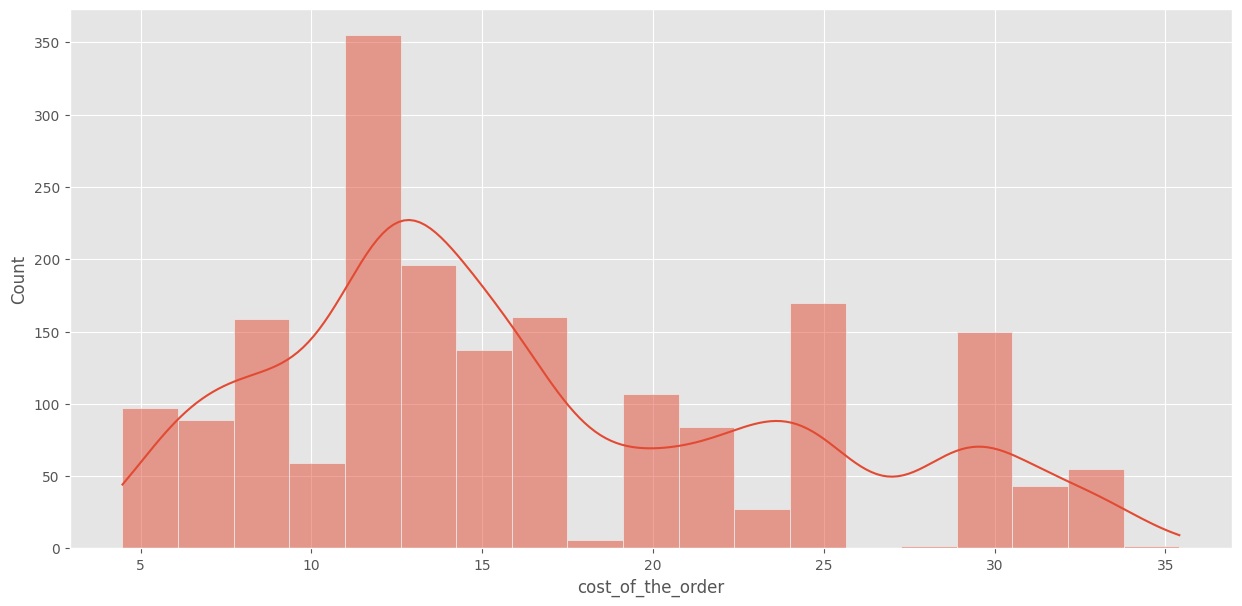

In [ ]:
plt.figure(figsize =(15,7))
sns.histplot(data =df, x ='cost_of_the_order', kde =True);

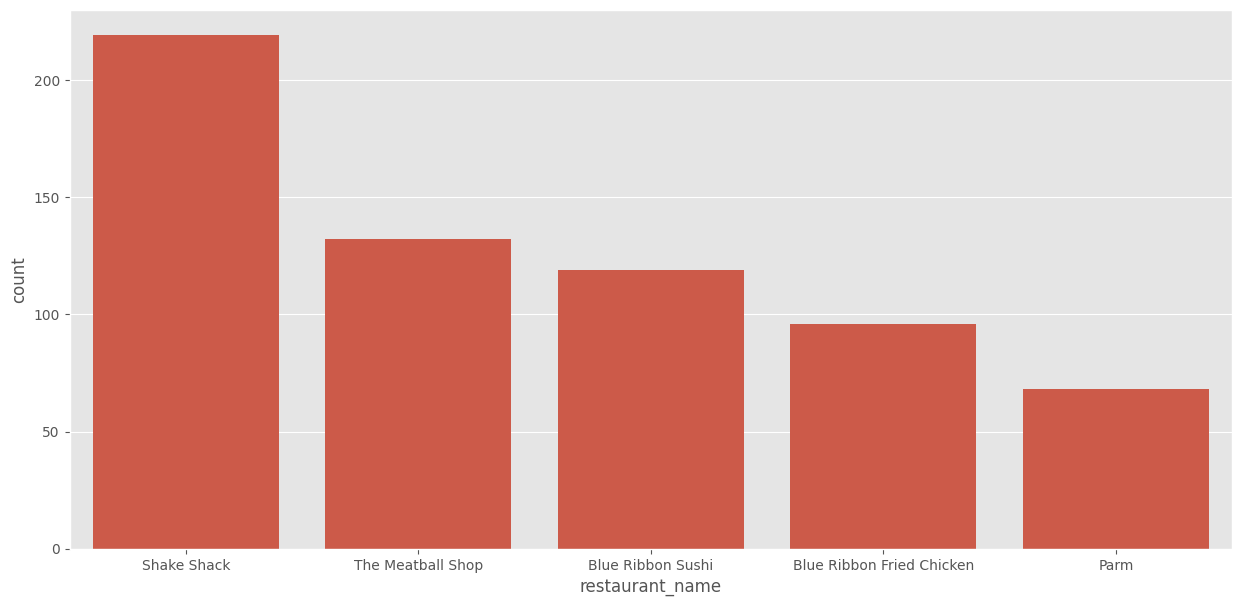

In [ ]:
plt.figure(figsize =(15,7))
sns.countplot(data =df, x ='restaurant_name', order= df['restaurant_name'].value_counts().head(5).index);

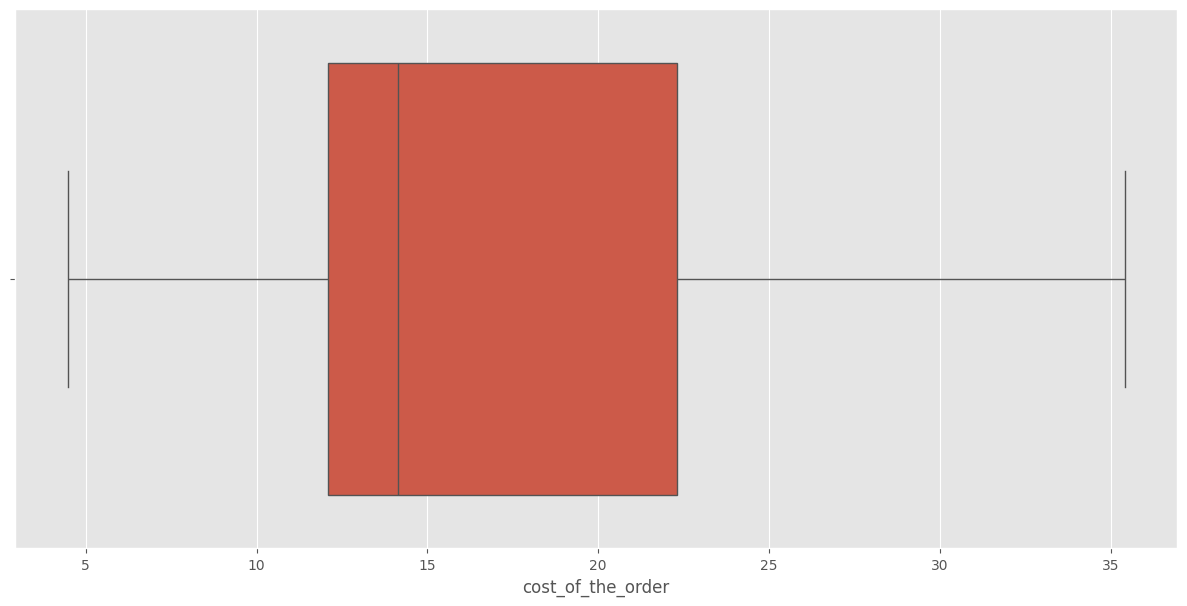

In [ ]:
plt.figure(figsize =(15,7))
#Instead of trying to plot the top 5 most frequent order costs, just plot the cost of the order
sns.boxplot(data =df, x ='cost_of_the_order');

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
top_five_restaurants = df['restaurant_name'].value_counts().head(5)
print(top_five_restaurants)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


Shake Shack, The Meatball Shop, Bule Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants in numbers of orders received, respectively.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Instead of trying to convert 'day_of_the_week' to datetime,
# filter the DataFrame directly for weekend entries:
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Get the most popular cuisine on weekends
popular_weekend_cuisine = weekend_data['cuisine_type'].value_counts().head(1)

print(popular_weekend_cuisine)

cuisine_type
American    415
Name: count, dtype: int64


#### Observations:
American cuisine is the most popular weekend cuisine.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
len(df(df('cost_of_the_order')))

In [ ]:
total_orders = len(df)
orders_above_20 = len(df[df['cost_of_the_order'] > 20])
percentage_above_20 = (orders_above_20 / total_orders) * 100
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")

Percentage of orders costing more than $20: 29.24%


#### Observations:


29.94% orders cost more than $20.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
delivery_time_mean = round(df['delivery_time'].mean(),2)
print(f"Mean order delivery time: {delivery_time_mean:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:


The mean order delivery time: 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head()

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations:


The top 5 Customer ID's and number of orders they have placed are:


1.  52832 - 13 orders
2.  47440 - 10 orders
3.  83287 - 9 orders
4.  250494 - 8 orders
5.  259341 - 7 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
#Ok, let's come up with some ideas:
#prep time vs. delivery time
#cuisine vs. delivery time
#cuisine_type vs. cost_of_order
#cuisine_type vs. preparation time

<Axes: >

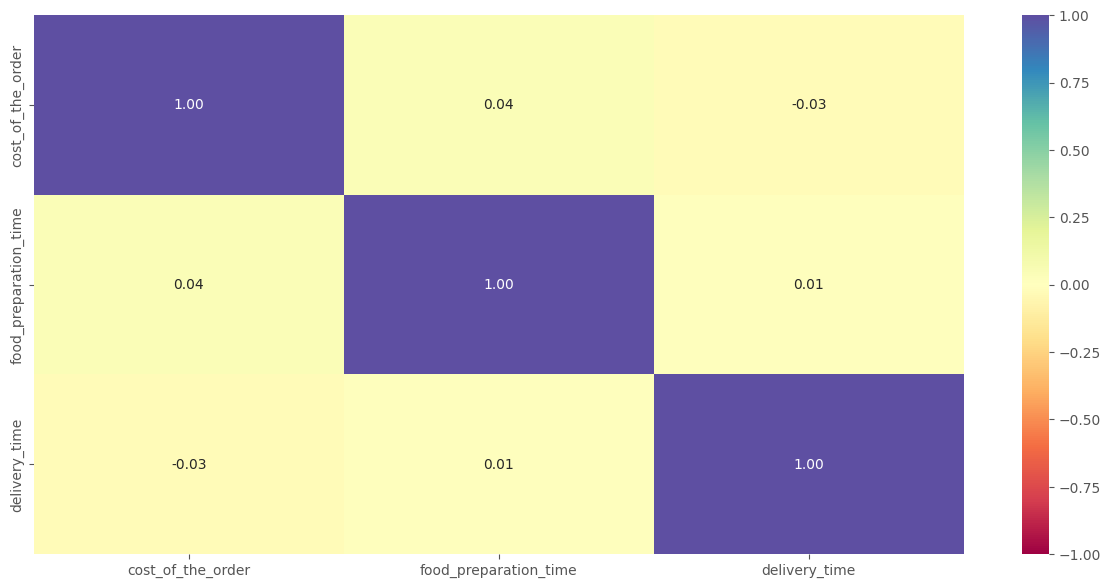

In [ ]:
num_var = ['cost_of_the_order','food_preparation_time', 'delivery_time']
plt.figure(figsize =(15,7))
sns.heatmap(data =df[num_var].corr(), annot =True,vmin =-1, vmax =1, fmt ='.2f', cmap ='Spectral')

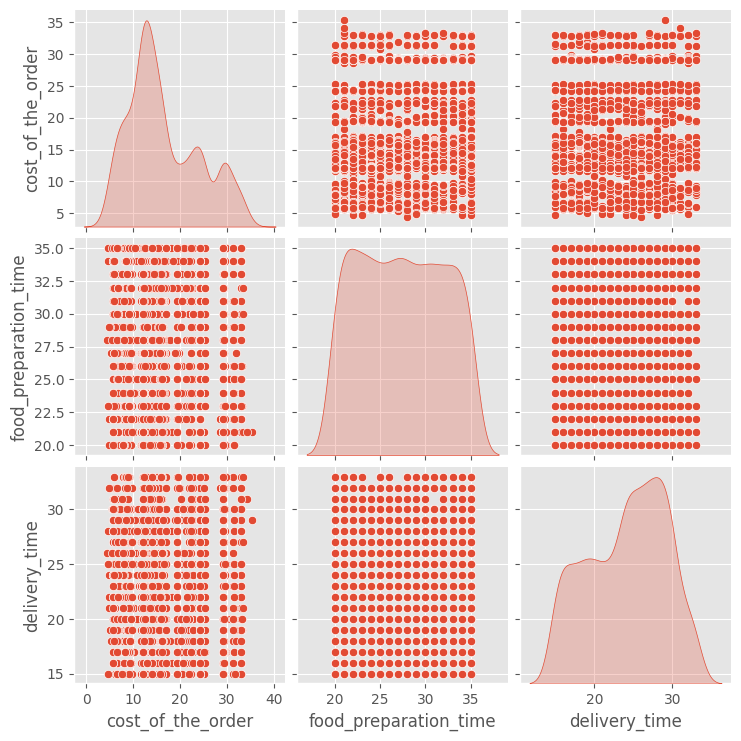

In [ ]:
sns.pairplot(data=df[num_var], diag_kind ='kde')

<Figure size 1500x700 with 0 Axes>

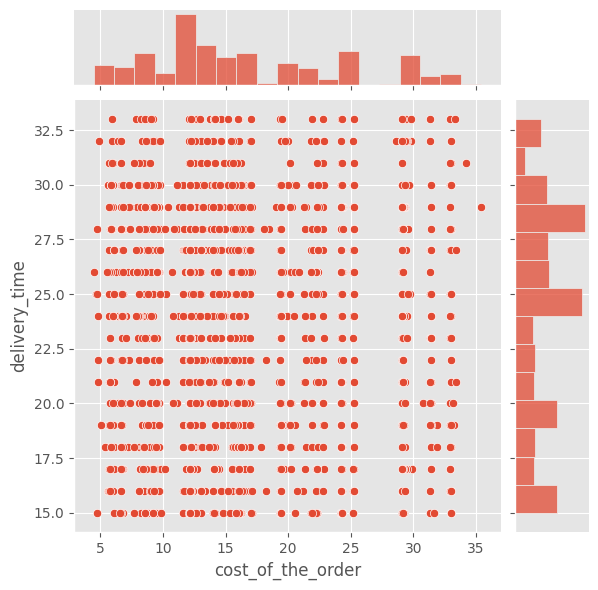

In [ ]:
plt.figure(figsize =(15,7))
sns.jointplot(data =df, x ='cost_of_the_order', y ='delivery_time', kind ='scatter');

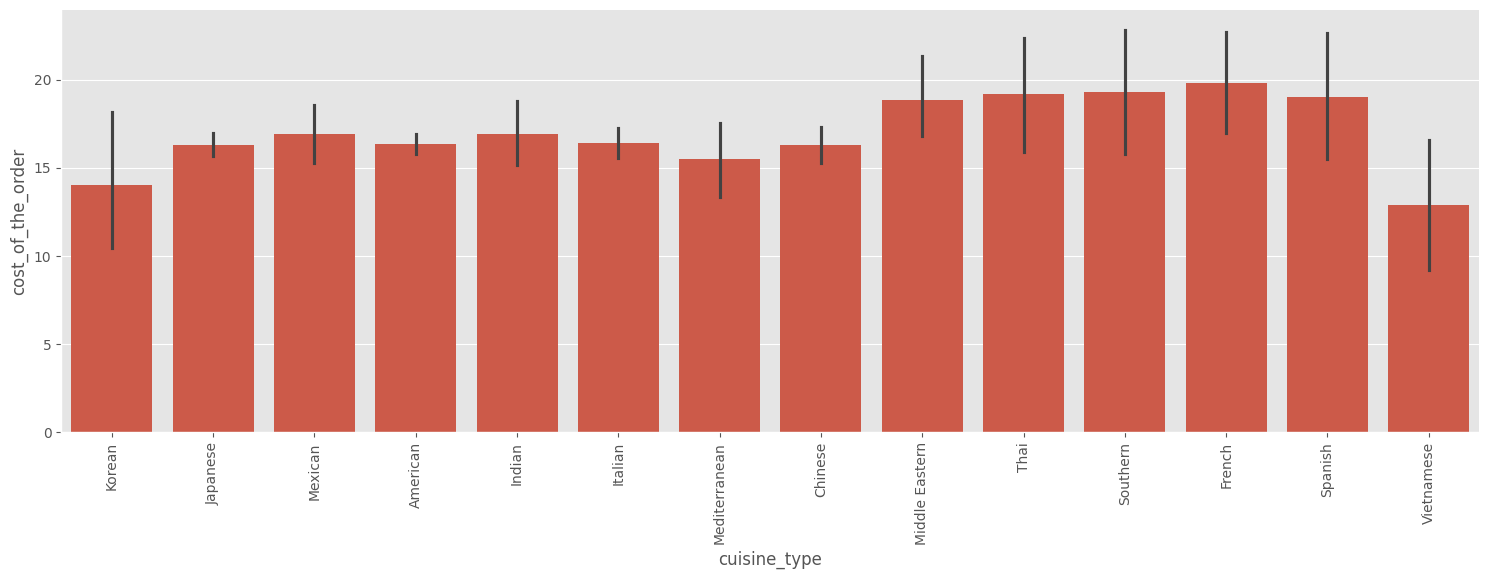

In [ ]:
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind="bar", height = 5, aspect =3)
plt.xticks(rotation=90)
plt.show()

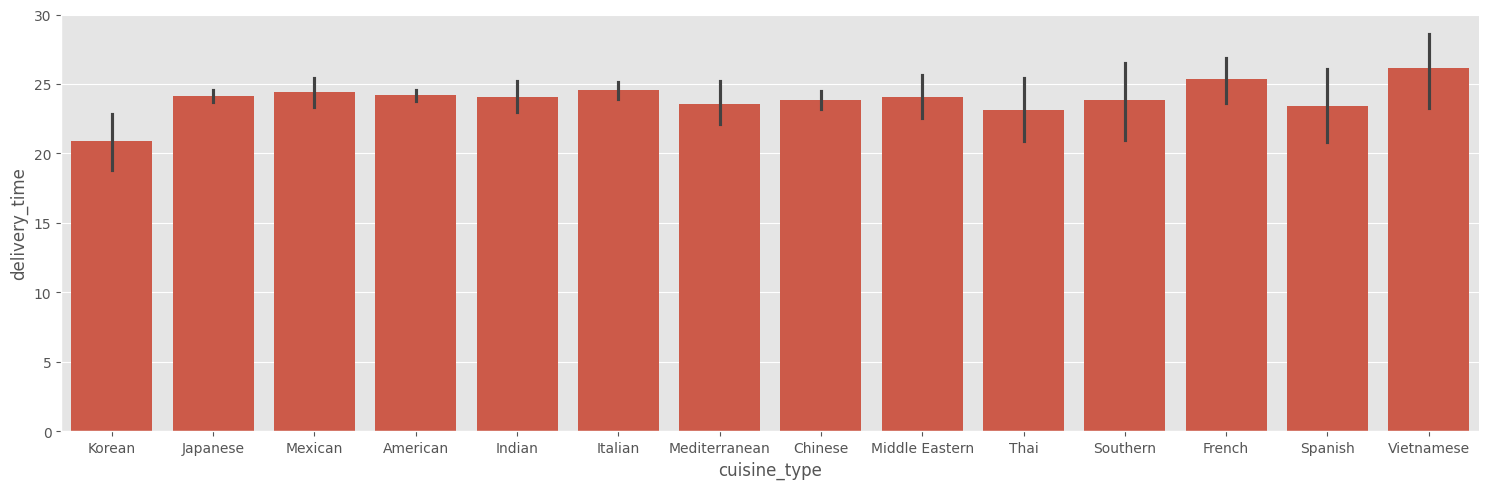

In [ ]:
sns.catplot(x='cuisine_type', y='delivery_time', data=df, kind="bar", height = 5, aspect =3)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
import pandas as pd

df = pd.read_csv('/foodhub_order.csv')

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df_clean = df.dropna(subset=['rating'])

restaurant_stats = df_clean.groupby('restaurant_name')['rating'].agg(
    rating_count='count',
    average_rating='mean'
).reset_index()

high_rated_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) &
    (restaurant_stats['average_rating'] > 4)
]

print(high_rated_restaurants)

               restaurant_name  rating_count  average_rating
16   Blue Ribbon Fried Chicken            64        4.328125
17           Blue Ribbon Sushi            73        4.219178
117                Shake Shack           133        4.278195
132          The Meatball Shop            84        4.511905


In [ ]:
df['rating'].unique()
df_nan = df.replace(to_replace= 'Not given', value =np.NaN)
df_nan['rating'] = df_nan['rating'].astype(dtype = 'float')
df_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
rest_rating = df_nan.groupby('restaurant_name')['rating'].mean().reset_index()
rest_count = df_nan.groupby('restaurant_name')['rating'].count().reset_index()
rest_rating_count = pd.merge(rest_rating, rest_count, on = 'restaurant_name')
rest_rating_count

,restaurant_name,rating_x,rating_y
0,'wichcraft,5.000000,1
1,12 Chairs,4.500000,2
2,5 Napkin Burger,4.000000,2
3,67 Burger,5.000000,1
4,Alidoro,NaN,0
...,...,...,...
173,Zero Otto Nove,4.000000,1
174,brgr,3.000000,1
175,da Umberto,5.000000,1
176,ilili Restaurant,4.153846,13


In [ ]:
final_data.rename(columns={'rating_x': 'average_rating', 'rating_y': 'rating_count'}, inplace=True)

In [ ]:
final_data = final_data[final_data['rating_count'] > 50]
final_data = final_data[final_data['average_rating'] > 4]
final_data

,restaurant_name,average_rating,rating_count
20,Blue Ribbon Fried Chicken,4.328125,64
21,Blue Ribbon Sushi,4.219178,73
136,Shake Shack,4.278195,133
153,The Meatball Shop,4.511905,84


#### Observations:


The restaurants which meet this criteria are:


*   Blue Ribbon Fried Chicken
*   Blue Ribbon Sushi
*   Shake Shack
*   The Meatball Shop





### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
def calculate_net_revenue(order_costs):
    net_revenue = 0.0
    for cost in order_costs:
        if cost > 20:
            net_revenue += cost * 0.25
        elif cost > 5:
            net_revenue += cost * 0.15
    return net_revenue

order_costs = df['cost_of_the_order'].tolist()
total_net_revenue = calculate_net_revenue(order_costs)

print(f"Net Revenue: ${total_net_revenue:.2f}")

Net Revenue: $6166.30


#### Observations:


The net revenue generated from all orders is $6,166.30.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Calculate total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders exceeding 60 minutes
orders_over_60 = df[df['total_time'] > 60]
percentage = (len(orders_over_60) / len(df)) * 100

print(f"Percentage of orders exceeding 60 minutes: {percentage:.2f}%")

Percentage of orders exceeding 60 minutes: 10.54%


#### Observations:


10.5% of all orders take more than 60 minutes to be prepared and then delivered to the customer.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
mean_delivery = df.groupby('day_of_the_week')['delivery_time'].mean().round(2)

print("Mean Delivery Time (minutes):")
print(mean_delivery)

Mean Delivery Time (minutes):
day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64


#### Observations:


The average delivery time on a weekday takes close to 28.5 minutes, while the average delivery time on weekends is 22.5 minutes.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---